# CA1: Dataframe Manipulation with Spotify Data

## Introduction
Pandas is an extremely powerful tool to handle large amounts of tabular data. In this compulsory assignment, you will use Pandas to explore one of the TA's personal spotify data in depth. \
\
Additional information:
- Feel free to create additional code cells if you feel that one cell per subtask is not sufficient.
- Remember, Pandas uses very efficient code to handle large amounts of data. For-loops are not efficient. If you ever have to use a for-loop to loop over the rows in the DataFrame, you have *probably* done something wrong.
- Label all graphs and charts if applicable.

## Task
I typically enjoy indie and rock music. I am a big fan of everything from old-fashioned rock and roll like Led Zeppelin and Jimi Hendrix, to newer indie artists like Joji and Lana Del Rey. This is why my spotify wrapped for 2023 came as quite a surprise:

<img src="spotifywrapped.PNG" alt="Image Description" width="20%">


Now, I'm no hater of pop music, but this was unexpected. 
For this assignment, you will investigate my listening habits, including a deep dive into my Ariana Grande listening habits, and try to find an answer to why she was my top artist; was there a fault in the spotify algorithm? Am I actually secretly an *Arianator*? (yes, I did have to look that up). Or am I just lying to myself about how often I listen to guilty pleasure music?

## Part 1: Initial loading and exploration

#### 1.0 Import necessary libraries: 
pandas, numpy, matplotlib.pyplot (other libraries such as seaborn or plotly are also allowed if you want prettier plots). It might also be a good idea to use **os** for task 2.0

In [124]:
import matplotlib.pyplot as plt
# ---- Insert other imports ----
import pandas as pd
import numpy as np

#### 1.1 Loading the data
Load the dataset in the file `streaming_history_0.csv` into a Pandas DataFrame called `df_spotify_0`.

In [125]:
df_spotify_0 = pd.read_csv('spotify_data/streaminghistory0.csv')

#### 1.2 Help function
Use the Python command `help` to help you understand how to use the `pd.DataFrame.head` and `pd.DataFrame.tail` methods.

In [126]:
help(pd.DataFrame.tail)
help(pd.DataFrame.head)

Help on function tail in module pandas.core.generic:

tail(self, n: 'int' = 5) -> 'Self'
    Return the last `n` rows.
    
    This function returns last `n` rows from the object based on
    position. It is useful for quickly verifying data, for example,
    after sorting or appending rows.
    
    For negative values of `n`, this function returns all rows except
    the first `|n|` rows, equivalent to ``df[|n|:]``.
    
    If n is larger than the number of rows, this function returns all rows.
    
    Parameters
    ----------
    n : int, default 5
        Number of rows to select.
    
    Returns
    -------
    type of caller
        The last `n` rows of the caller object.
    
    See Also
    --------
    DataFrame.head : The first `n` rows of the caller object.
    
    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal
    

#### 1.3 Getting an overview
Print the first `five` and last `ten` rows of the dataframe. Have a quick look at which columns are in the dataset. 

In [127]:
df_spotify_0.head(5)
df_spotify_0.tail(10)

            endTime            artistName                        trackName  \
0  2022-12-03 02:02  Cigarettes After Sex                            Truly   
1  2022-12-03 02:02         Leonard Cohen  Take This Waltz - Paris Version   
2  2022-12-06 21:05          Vlad Holiday                 So Damn Into You   
3  2022-12-06 21:05                 Lorde                             Team   
4  2022-12-06 21:05         Ariana Grande                         Into You   

   msPlayed  
0   30000.0  
1    8210.0  
2   37895.0  
3    8984.0  
4    1221.0  
                endTime         artistName                     trackName  \
11949  2023-01-02 20:58      Ariana Grande                    six thirty   
11950  2023-01-02 20:58      Leonard Cohen          Thanks for the Dance   
11951  2023-01-02 20:59           Des Rocs          Used to the Darkness   
11952  2023-01-02 20:59  Caroline Polachek         Hit Me Where It Hurts   
11953  2023-01-02 20:59  Caroline Polachek         Hit Me Where It 

#### 1.4 Formatting correctly
When working with Pandas, it's very useful to have columns which contains dates in a specific format called *datetime*. This allows for efficient manipulation and analysis of time-series data, such as sorting, filtering by date or time, and resampling for different time periods. Figure out which column(s) would be appropriate to convert to datetime, if any, and if so, perform the conversion to the correct format.

In [128]:

df_spotify_0['endTime']= pd.to_datetime(df_spotify_0['endTime'])
df_spotify_0.head(5)

              endTime            artistName                        trackName  \
0 2022-12-03 02:02:00  Cigarettes After Sex                            Truly   
1 2022-12-03 02:02:00         Leonard Cohen  Take This Waltz - Paris Version   
2 2022-12-06 21:05:00          Vlad Holiday                 So Damn Into You   
3 2022-12-06 21:05:00                 Lorde                             Team   
4 2022-12-06 21:05:00         Ariana Grande                         Into You   

   msPlayed  
0   30000.0  
1    8210.0  
2   37895.0  
3    8984.0  
4    1221.0  


#### 1.5 Unique artists
Find how many unique artists are in the dataset.


In [146]:
len(df_spotify_0['artistName'].unique())

495

#### 1.6 Unique songs
Find how many unique songs are in the dataset.

In [147]:
len(pd.unique(df_spotify_0['trackName']))

1308

### Part 1: Questions
Q1: Which columns are in the dataset?

Q2: What timeframe does the dataset span?

Q3: How many unique artists are in the dataset?

Q4: How many unique songs are in the dataset?

#### Q1
`print(list(df_spotify_0.columns))`

['endTime', 'artistName', 'trackName', 'msPlayed']

#### Q2

`print(df_spotify_0['endTime'].max())`

`print(df_spotify_0['endTime'].min())`

`print(df_spotify_0['endTime'].max() - df_spotify_0['endTime'].min())`

Played between 2022-12-03 02:02:00 and 2023-01-02 20:59:00 with a total time of 30 days and 18 hours and 57 minutes

#### Q3
`print(len(df_spotify_0['artistName'].unique()))`

495 uniqe artists

#### Q4
`print(len(df_spotify_0['trackName'].unique()))`

1308 different songs

## Part 2: Working with all the data

#### 2.0 Importing all the dataframes
In Task 1, you only worked with about a month worth of data. Now, you will work with over a year worth. 

In the *spotify_data* folder, there is more than just one listening record. Load each of the 14 listening records into a dataframe (1 dataframe per listening record), and concatenate them together into one large dataframe named `df`.

In [131]:
files = 14
li = []
for i in range(files):
    file = 'spotify_data/streaminghistory' + str(i) + '.csv'
    df_spotify = pd.read_csv(file)
    li.append(df_spotify)

df = pd.concat(li, axis=0, ignore_index=True)


#### 2.1 Sorting by time
Datasets often aren't perfect. One example of an issue that could occur is that the time-based data might not be in chronological order. If this were to happen, the rows in your dataframe could be in the wrong order. To ensure this isn't an issue in your dataframe, you should sort the dataframe in chronological order, from oldest to newest.

In [132]:
df = df.sort_values(by='endTime')


#### 2.2 Setting a timeframe
For this investigation, we are only interested in investigating listening patterns from **2023**. Remove any data not from **2023** from the DataFrame.

In [148]:
df = df[~(df['endTime'] < '2023-01-01')]
df.tail(5)

,endTime,artistName,trackName,secPlayed,hour,skipped
167429,2023-12-07 21:13:00,Arctic Monkeys,Snap Out Of It,1,21,1
167435,2023-12-07 21:13:00,Ariana Grande,off the table (with The Weeknd),13,21,1
167437,2023-12-07 21:14:00,Leonard Cohen,Thanks for the Dance,9,21,1
167436,2023-12-07 21:14:00,Ariana Grande,my hair,23,21,1
167438,2023-12-07 21:17:00,The Vaccines,Your Love Is My Favourite Band,14,21,1


#### 2.3 Deleting rows
Often in Data Science, you will encounter when a row entry has the value *NaN*, indicating missing data. These entries can skew your analysis, leading to inaccurate conclusions. For this task, identify and remove any rows in your DataFrame that contain NaN values. \
Later in the course, you might encounter other techniques of dealing with missing data, typically reffered to as *data imputation*. Here, though, you are just supposed to delete the entire rows with missing data.

In [134]:
df = df.dropna()


#### 2.4 Convert from milliseconds to seconds
From `msPlayed`, create a new column `secPlayed` with the data converted from milliseconds to seconds. Then delete the column `msPlayed`.

In [135]:
df['secPlayed']= (df['msPlayed'] / 1000)
df.drop(['msPlayed'], axis=1, inplace=True)

#### 2.5 Finding top 10 favorite artists
Find the top `ten` artists with the highest total play time (in seconds). Plot your findings in a bar graph. \
(hint: start by creating a new DataFrame with only `artistName` and your time column. To proceed, you will also likely need the `groupby` command from Pandas.)

artistName
Ariana Grande          169476
Joji                   135444
The Pretty Reckless    108675
Cage The Elephant       93326
Lana Del Rey            89098
Greta Van Fleet         86923
The Neighbourhood       84192
Gorillaz                83607
Led Zeppelin            75602
Arctic Monkeys          75122
Name: secPlayed, dtype: int64


<BarContainer object of 10 artists>

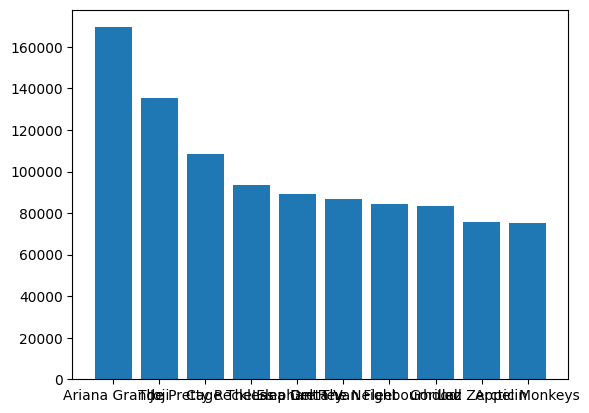

In [136]:
df['secPlayed'] = df['secPlayed'].astype(int)
artist = df['secPlayed'].groupby(df['artistName']).sum().nlargest(10)
print(artist)
plt.bar(artist.index, artist.values)

#### 2.6 Finding top 10 favorite songs
Find the top `ten` songs with the highest play time. Create a graph visualizing the results.

trackName
Les                                 31043
O Children                          24205
When the Levee Breaks - Remaster    22202
Heartbeat                           21649
Afterthought                        21339
A Change Is Gonna Come              20133
Bones                               18394
FEEL.                               18334
Bad Ones (feat. Tegan and Sara)     18177
Love It If We Made It               16616
Name: secPlayed, dtype: int64


<BarContainer object of 10 artists>

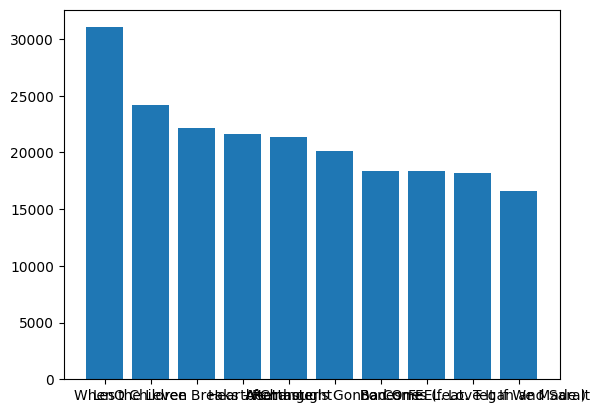

In [137]:
track = df['secPlayed'].groupby(df['trackName']).sum().nlargest(10)
print(track)
plt.bar(track.index, track.values)

## Part 3: Further analysis

#### 3.0 Average listening time by hour
Generate a plot that displays the average amount of time that music is played for each hour of the day.

hour
0     30.223082
1     42.570896
2     17.733333
3     44.175439
4     17.592233
5     27.443489
6     23.202488
7     22.463726
8     21.469827
9     22.483307
10    22.578770
11    24.084123
12    21.735235
13    23.123475
14    24.227153
15    26.066660
16    25.780143
17    20.451806
18    26.946565
19    25.901614
20    25.547857
21    21.650492
22    21.322595
23    24.325161
Name: secPlayed, dtype: float64


<BarContainer object of 24 artists>

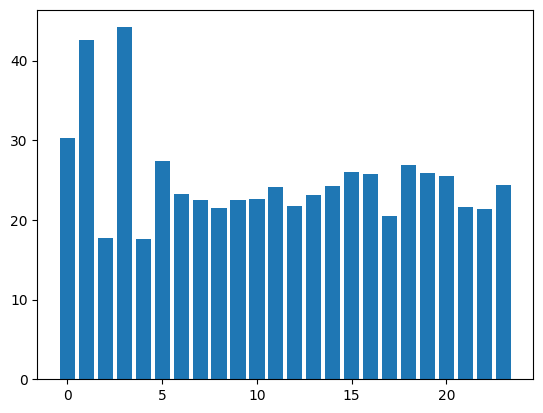

In [138]:
df['endTime'] = pd.to_datetime(df['endTime'])
df['hour'] = df['endTime'].dt.hour
hour = df['secPlayed'].groupby(df['hour']).mean()
print(hour)
plt.bar(hour.index, hour.values)


#### 3.1 Morning music and evening music
I think many people find that some types of music are more suitable for morning listening and some music is more suitable for evening listening. Create a plot that compares the play time of the artists *Leonard Cohen* and *Rage Against the Machine* on an hour-by-hour basis. See if there are any differences.

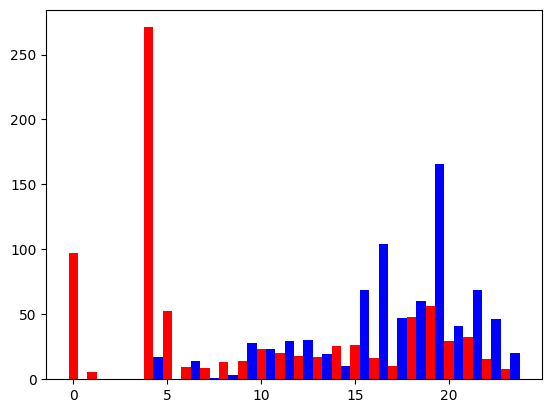

In [149]:
leonard = df[df['artistName'] == 'Leonard Cohen']
leonard = leonard['secPlayed'].groupby(leonard['hour']).mean()
plt.bar(leonard.index, leonard.values, 0.5, color='red')

rage = df[df['artistName'] == 'Rage Against The Machine']
rage = rage['secPlayed'].groupby(rage['hour']).mean()
plt.bar(rage.index + 0.5, rage.values, 0.5 ,color='blue')
plt.show()


#### 3.2 Analysing skipped songs
Determining whether a song was skipped or listened to can be challenging. For this analysis, we'll simplify by defining a skipped song as any track played for less than 30 seconds. Conversely, a song played for 30 seconds or more is considered listened to. \
 Add a column to your DataFrame to reflect this criteria: set the value to 1 if the song was played for less than 30 seconds (indicating a skipped song), and 0 if it was played for 30 seconds or longer.

In [140]:
df['skipped'] = np.where(df['secPlayed'] < 30, 1, 0)

#### 3.3 Plotting skipped songs
Create a pie-chart that compares amount of skipped songs to amount of non-skipped songs.

([<matplotlib.patches.Wedge at 0x122b851c0>,
 [Text(-0.9948341876279385, 0.46936652961908115, 'skipped'),
  Text(0.9948341876279383, -0.4693665296190817, 'Not skipped')],
 [Text(-0.5426368296152391, 0.2560181070649533, '86.0%'),
  Text(0.542636829615239, -0.25601810706495365, '14.0%')])

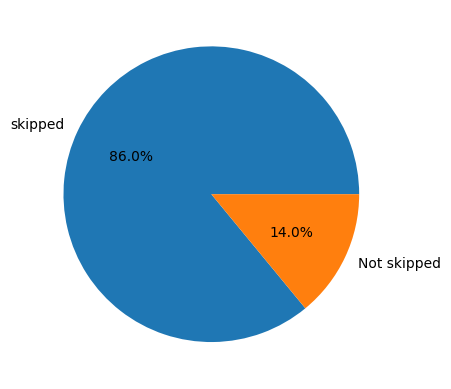

In [141]:
skipped = df['skipped'].value_counts()
plt.pie(skipped, labels=["skipped", "Not skipped"], autopct='%1.1f%%')

#### 3.4 Artists by percentage of songs skipped
For each artist in the dataset, calculate which percentage of their songs was skipped. Store this information in a new DataFrame called `df_skipped`. Store the percentage of skipped songs in a new column named `SkipRate`\
\
**Example**: If an artist has **100** songs in your dataset and **25** of these were skipped, the percentage of skipped songs for this artist would be $\frac{25}{100}=25\%$

In [142]:
df_skipped = df.groupby('artistName').agg({'skipped': 'mean'})
df_skipped = df_skipped.rename(columns={'skipped': 'SkipRate'})
print(df_skipped)

               SkipRate
artistName             
10cc           0.678571
2Pac           0.861598
3 Doors Down   0.500000
4 Non Blondes  0.721311
50 Cent        0.678571
...                 ...
squeeda        0.666667
tenkousei.     1.000000
trxxshed       0.500000
xander.        0.375000
Édith Piaf     0.941935

[956 rows x 1 columns]


#### 3.5 Comparing artists by skip-rate 
Find the `three` top artists with the lowest skip-rate and the `three` with the highest. Print their names, along with their skip-rate.

In [151]:
df_skipped = df_skipped.sort_values(by='SkipRate', ascending=False)
print(df_skipped.head(3))
print(df_skipped.tail(3))

                   SkipRate
artistName                 
Hannah Montana          1.0
A Problem Squared       1.0
Moderator               1.0
               SkipRate
artistName             
LACES          0.142857
Roc Boyz       0.111111
Gloria Gaynor  0.000000


## Part 4: God Is a Data Scientist - The Ariana Deep-Dive

#### 4.0 Ariana-DataFrame: 
Create a new DataFrame called *df_ariana*, containing only rows with music by Ariana Grande.

In [144]:
df_ariana = df[df['artistName'] == 'Ariana Grande']

#### 4.1 Average skip rate
Create a histogram of the distribution of the skip-rate values of the different artists in your DataFrame  `df_skipped`, with skip rates on one axis and number of artists on the other. \
\
Then, retrieve the skip rate for Ariana Grande from your DataFrame `df_skipped`. Run the code in the cell below. Where on this distribution does Ariana Grande fall? Do I skip her songs more than average, or less?

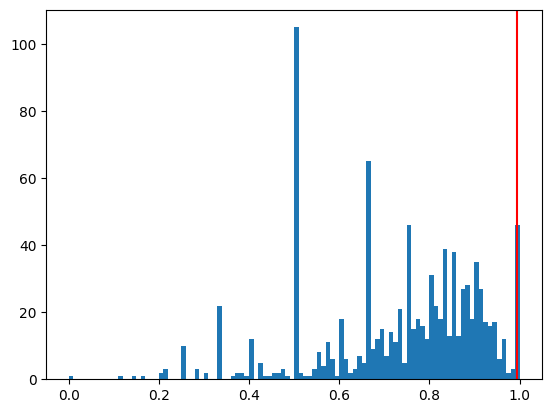

In [145]:
plt.hist(df_skipped['SkipRate'], bins=100)
plt.axvline(df_skipped.loc['Ariana Grande', 'SkipRate'], color='red')
plt.show()


### Part 4: Questions
Q1: Did I skip a lot of Ariana Grande's songs, or did I not, compared to the rest of the dataset? \
Q2: What might be some possible reasons for Ariana Grande to be my nr.1 artist?

#### Q1
Did skip a lot of Ariana Grandes songs.

#### Q2
lots of songs started. She is the one with most play time, even when she is mostly skipped. 
One reson is that she have many popular songs that are in a lot of playlist on spotify, and one is that you have skipped a lot of songes
but it is in precentage so might also have listen to a lot.